<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec12-Naive_bayes.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Naive Bayes
---

This is the lecture note for **Naive Bayes**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to Naive Bayes. I encourage you to read further about decision trees. </p>

Read more:
- [Naive Bayes spam filtering - wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering)
- [Naive Bayes classifier - wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification)
- [Naive Bayes spam - Towards Data Science](https://towardsdatascience.com/how-to-build-and-apply-naive-bayes-classification-for-spam-filtering-2b8d3308501)
- [Bernouill Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)
- [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
- [Complement Naive Bayes - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)
- [VotingClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
---


## Spam/ham classification

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
np.sum(df[df.columns[2:].tolist()].notna())

/home/raphael/ITHS/AI24/Maskininlärning/Machine-learning-AI24/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [16]:
print(df.shape)
df.loc[df["Unnamed: 2"].notna()].iloc[:5]

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [17]:
df_no_NaN = df.dropna(axis=1)
df_no_NaN.columns = ["class", "content"]
df_no_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='class', ylabel='count'>

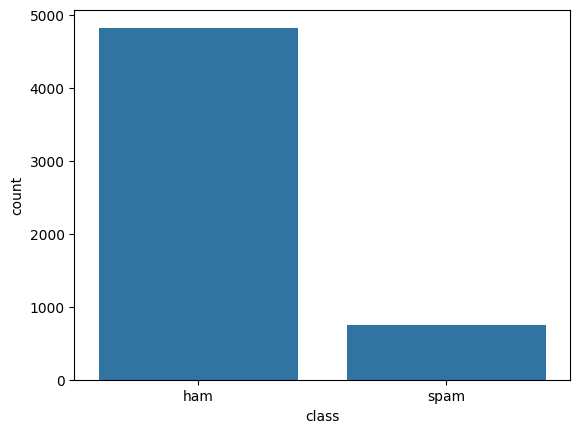

In [18]:
sns.countplot(data=df_no_NaN, x="class")

In [19]:
df = pd.get_dummies(df_no_NaN, columns=["class"], drop_first=True)
X, y = df["content"], df["class_spam"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: content, dtype: object

---
## TF-IDF vector

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf.fit_transform(X)
print(X_tfidf[1])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 8404)>
  Coords	Values
  (0, 5343)	0.27211951321382544
  (0, 4385)	0.4082988561907181
  (0, 4192)	0.5236458071582338
  (0, 8134)	0.4316010362639011
  (0, 5369)	0.5465881710238072


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<Axes: xlabel='class_spam', ylabel='count'>

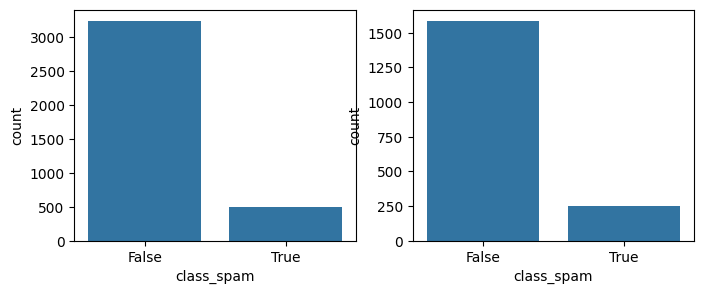

In [22]:
fig, ax = plt.subplots(1,2, dpi=100, figsize=(8,3))
sns.countplot(x = y_train, ax = ax[0])
sns.countplot(x = y_test, ax = ax[1])

---
## Naive Bayes

- family of probability classifiers based on Bayes theorem
- they have strong naive independent assumption between features 
- for text it means that the each word is assumed to be independent of other words (bag of words model)

For features $\vec{x} = (x_1,\ldots, x_n)$ and class $k$ the Bayes theorem gives: 
$$P(C_k|\vec{x}) \overbrace{=}^{Bayes} \frac{P(C_k)P(\vec{x}|C_k)}{P(\vec{x})} \overbrace{=}^{\text{conditional probability}} \frac{P(C_k, x_1, \ldots, x_n)}{P(\vec{x})}$$

Note first that $P(\vec{x})$ is the same value and we make an assumption that all features are mutually independent of each other. This assumption is naive as for words in a document, usually they are dependent on each other. 

$$P(C_k|x_1,\ldots, x_n) \propto P(C_k, x_1, \ldots, x_n) \propto P(C_k)P(x_1|C_k)P(x_2|C_k)\ldots P(x_n|C_k) \propto P(C_k)\prod_{i=1}^{n}P(x_i|C_k)$$

By combining this model with a maximum a posteriori (MAP) decision rule we get a classifier for $\hat{y} = C_k$: 
$$\hat{y} = \arg \max_{k\in\{1,\ldots,K\}} P(C_k)\prod_{i=1}^{n}P(x_i|C_k)$$

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1587
        True       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



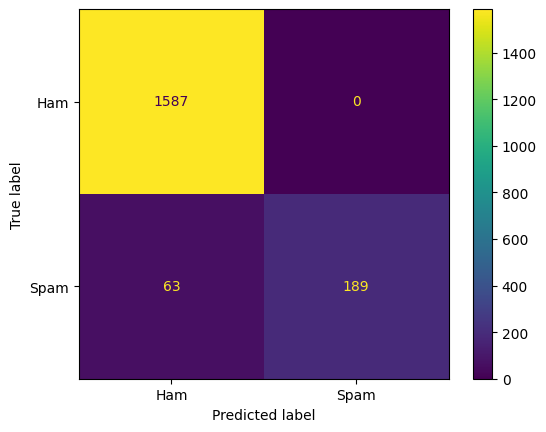

In [25]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    bernoulli = BernoulliNB(),
    complement = ComplementNB()
)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Ham", "Spam"]).plot()
# precision = TP / (TP+FP)
# recall = TP /(TP+FN)
evaluate_model(naive_bayes["multinomial"])

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1587
        True       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



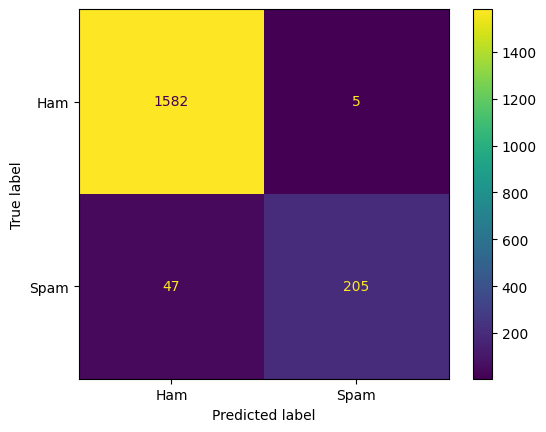

In [26]:
evaluate_model(naive_bayes["bernoulli"])

              precision    recall  f1-score   support

       False       0.99      0.92      0.96      1587
        True       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



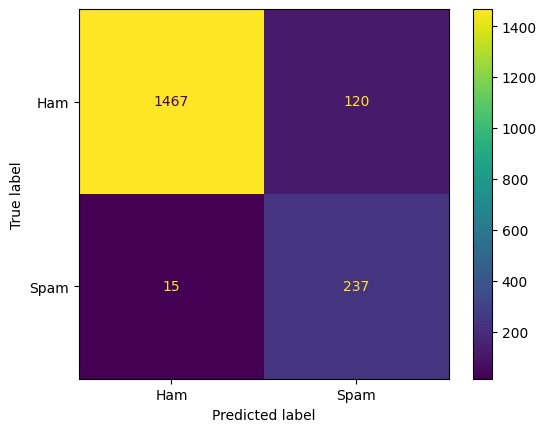

In [27]:
evaluate_model(naive_bayes["complement"])

---
## Trying other models

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1587
        True       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



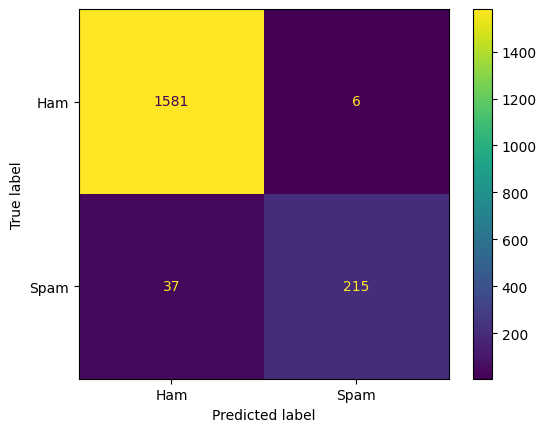

In [28]:
from sklearn.svm import LinearSVC
evaluate_model(LinearSVC())


              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1587
        True       1.00      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



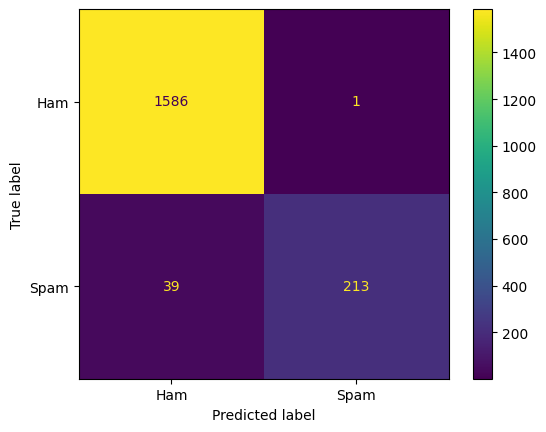

In [29]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

---
## Combining models 

- majority voting
- the class with most votes wins

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1587
        True       1.00      0.85      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



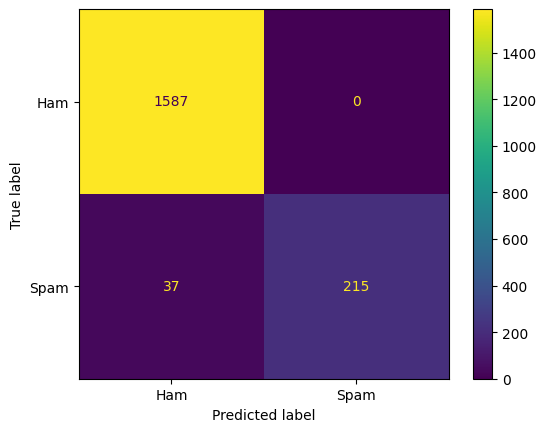

In [30]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(
    [("rf", RandomForestClassifier()),
     ("svc", LinearSVC()),
     ("naive_complement", ComplementNB()),
     ("naive_bernoulli", BernoulliNB()),
     ("naive_multinomial", MultinomialNB())]
     , voting="hard", n_jobs=-1
)
evaluate_model(vote_clf)

---
## Deployment

In [31]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

pipe.fit(X, y)
pipe.predict(["Come and collect you $4.5 million in Bitcoins!"])

array([False])

In [33]:
pipe.predict(["You will win $1000 for free"])

array([ True])

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
